# **Handwritten Digit Calssification**


---



---






1.   Our goal is to classify handwritten digits from 0 to 9 into correect categories
2.   For this we are using minist data set which is already provided by tensorflow as an api







IMPORTING LIBRARIES

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


LOADING THE DATA SET AND SPLITTING INTO TRAIN AND TEST DATA

In [3]:
(x_train , y_train) , (x_test,y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


PLOTTING FEW DATAS FROM THE DATA SET

Loaded data_set


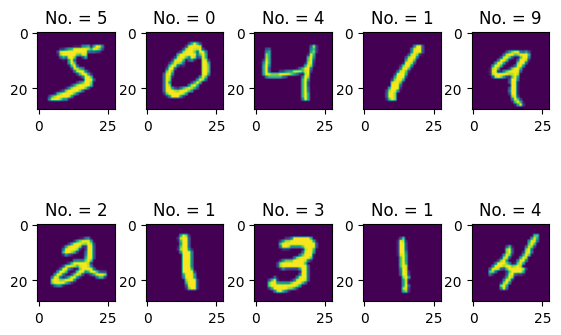

In [4]:
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0)
print("Loaded data_set")
for i in range(0,10) :
  plt.subplot(2,5,i+1)
  plt.imshow(x_train[i])
  plt.title("No. = " +str(y_train[i]))

NORMALIZING THE DATA

In [5]:
x_train , x_test = x_train/255 , x_test/255

CREATING A BALL BACK FUNCTION



> By creating this class we will be able to stop the further training of our model once a desired acurray is reached . For this case we are expencting a acuuracy more than 99%.



In [6]:
class myCallbacks(tf.keras.callbacks.Callback) :
  def on_epoch_end(self,epochs,logs={}) :
    if logs.get('accuracy') is not None and logs.get('accuracy') > 0.99 :
      print('\nReached 99% accuracy so cancelling traning !')
      self.model.stop_training = True


callback = myCallbacks()



Designing our model and training it on the test data

In [7]:

model = tf.keras.Sequential(
   [
       tf.keras.layers.Flatten(input_shape=(28,28)),
       tf.keras.layers.Dense(128,activation=tf.nn.relu),
       tf.keras.layers.Dense(10,activation=tf.nn.softmax)
   ]
)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=10,callbacks=[callback])

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2586 - accuracy: 0.9262
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1131 - accuracy: 0.9662
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0788 - accuracy: 0.9760
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0582 - accuracy: 0.9818
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0452 - accuracy: 0.9861
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0358 - accuracy: 0.9887
Epoch 7/10
1861/1875 [============================>.] - ETA: 0s - loss: 0.0283 - accuracy: 0.9912
Reached 99% accuracy so cancelling traning !
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0284 - accuracy: 0.9912


Evaluating our model on the test data

In [24]:
predict_x=model.predict(x_test)
classes_x=np.argmax(predict_x,axis=1)

313/313 [==============================] - 0s 1ms/step


Loaded data_set


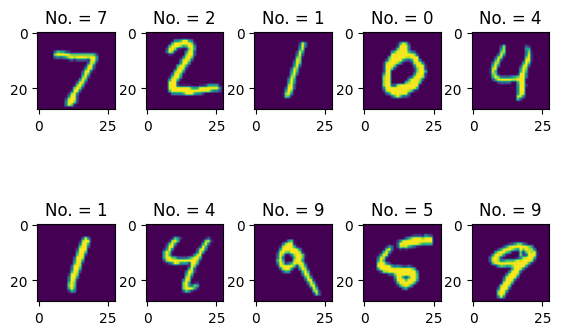

In [25]:
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0)
print("Loaded data_set")
for i in range(0,10) :
  plt.subplot(2,5,i+1)
  plt.imshow(x_test[i])
  plt.title("No. = " +str(classes_x[i]))